# 지도학습_다중회귀분석_고객별연간지출액예측

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_csv("./data/ecommerce.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


============================== Email ==============================
500 ['mstephenson@fernandez.com' 'hduke@hotmail.com' 'pallen@yahoo.com'
 'riverarebecca@gmail.com' 'mstephens@davidson-herman.com'
 'alvareznancy@lucas.biz' 'katherine20@yahoo.com' 'awatkins@yahoo.com'
 'vchurch@walter-martinez.com' 'bonnie69@lin.biz' 'andrew06@peterson.com'
 'ryanwerner@freeman.biz' 'knelson@gmail.com' 'wrightpeter@yahoo.com'
 'taylormason@gmail.com' 'jstark@anderson.com' 'wjennings@gmail.com'
 'rebecca45@hale-bauer.biz' 'alejandro75@hotmail.com'
 'samuel46@love-west.net' 'megan33@gmail.com' 'agolden@yahoo.com'
 'vstafford@hotmail.com' 'denise22@hernandez-townsend.com'
 'youngbarbara@yahoo.com' 'william25@mcconnell.com'
 'ijones@schaefer-carr.net' 'heatherhall@yahoo.com'
 'tinasmith@martinez.info' 'chasejennifer@hotmail.com'
 'jenniferbarnett@gmail.com' 'jared39@hotmail.com'
 'briancarlson@page-fleming.com' 'joshuaodom@gmail.com'
 'vickie90@lee-wilson.com' 'duane56@hotmail.com' 'enash@gmail.com'
 'san

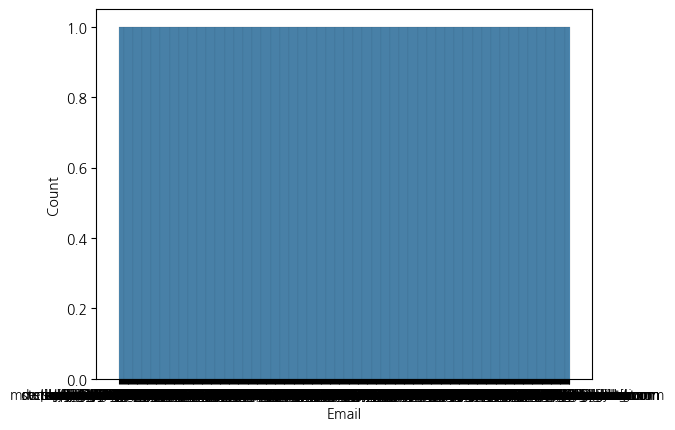

Email
kyang@diaz.org                     765.518462
asilva@yahoo.com                   744.221867
william82@gmail.com                725.584814
jeffrey54@mcdonald-williams.com    712.396327
rhonda01@gmail.com                 708.935185
                                      ...    
fischermonica@gmail.com            298.762008
morganorozco@hotmail.com           282.471246
brian51@cook.info                  275.918421
brandon77@richardson.com           266.086341
alexandra26@summers-davis.com      256.670582
Name: Yearly Amount Spent, Length: 500, dtype: float64


============================== Address ==============================
500 ['835 Frank Tunnel\nWrightmouth, MI 82180-9605'
 '4547 Archer Common\nDiazchester, CA 06566-8576'
 '24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564'
 '1414 David Throughway\nPort Jason, OH 22070-1220'
 '14023 Rodriguez Passage\nPort Jacobville, PR 37242-1057'
 '645 Martha Park Apt. 611\nJeffreychester, MN 67218-7250'
 '68388 Reyes Lights Suite 

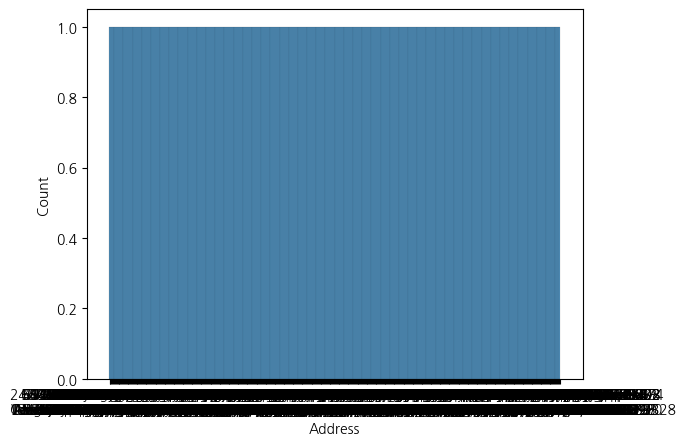

Address
223 Love Trail Suite 831\nPort Jeffrey, IN 46849                      765.518462
USNV Johnson\nFPO AP 19026                                            744.221867
11143 Park Squares\nSamanthatown, UT 97073                            725.584814
297 Francis Valley\nSouth Lindsey, NY 13669-5367                      712.396327
939 Watson Run\nStaceyberg, VT 58376-0454                             708.935185
                                                                         ...    
9847 Michael Plaza Suite 837\nLake Christophershire, NV 87324-8427    298.762008
0001 Mack Mill\nNorth Jennifer, NE 42021-5936                         282.471246
0508 Terrance Cliff\nRebekahtown, NC 48724-8308                       275.918421
109 Jessica Manor\nNorth Patriciashire, PR 84726                      266.086341
Unit 7032 Box 7016\nDPO AE 44749-2992                                 256.670582
Name: Yearly Amount Spent, Length: 500, dtype: float64


============================== Avatar ======

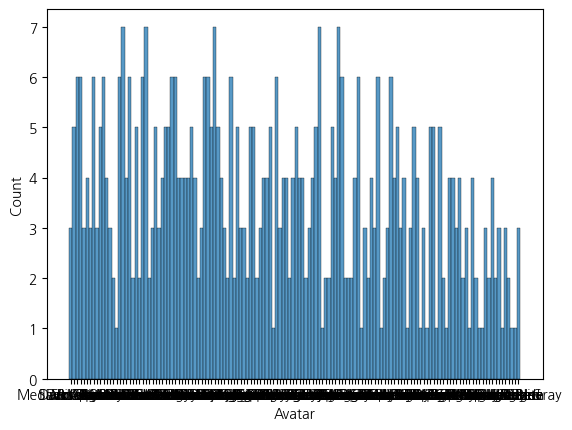

Avatar
DarkGray         633.132606
Coral            616.660286
LightCoral       601.816888
DarkSlateGray    593.038294
Ivory            581.237714
                    ...    
Red              425.745092
Purple           420.452550
DarkBlue         419.632942
LightPink        406.722105
Navy             386.647947
Name: Yearly Amount Spent, Length: 138, dtype: float64


============================== Avg. Session Length ==============================
500 [34.49726773 31.92627203 33.00091476 34.30555663 33.33067252 33.87103788
 32.0215955  32.73914294 33.9877729  31.93654862 33.99257277 33.87936082
 29.53242897 33.19033404 32.38797585 30.73772037 32.1253869  32.33889932
 32.18781205 32.61785606 32.91278511 33.50308726 31.53160448 32.90325097
 34.507551   33.02933195 33.54123131 32.33598964 33.11020506 33.10543794
 33.24190043 33.4610563  32.17550124 32.72836    32.82030995 33.61603789
 31.72165236 32.86532717 32.74936818 32.56723048 32.07054622 33.01954799
 33.79203908 32.89398062 32.044

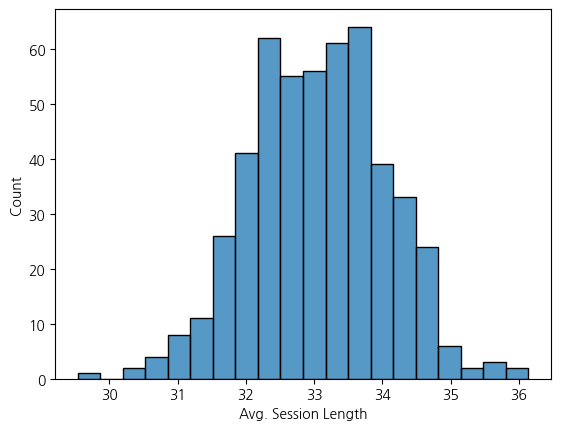

Avg. Session Length
34.374258    765.518462
34.603311    744.221867
33.256335    725.584814
34.967610    712.396327
34.385820    708.935185
                ...    
32.529769    298.762008
30.492537    282.471246
31.517122    275.918421
30.816201    266.086341
32.836941    256.670582
Name: Yearly Amount Spent, Length: 500, dtype: float64


============================== Time on App ==============================
500 [12.65565115 11.10946073 11.33027806 13.71751367 12.79518855 12.02692534
 11.36634831 12.35195897 13.38623528 11.81412829 13.33897545 11.584783
 10.9612984  12.95922609 13.14872569 12.63660605 11.73386169 12.01319469
 14.71538754 13.98959256 11.36549203 12.8779837  13.37856278 11.65757592
 12.8936695  11.76581265 12.78389178 13.00781942 11.98204499 11.96502
 12.30541781 10.86916381 13.38749211 13.10450724 11.63489325 11.9363865
 11.7550237  11.98441752  9.95497597 12.48901322 11.73310622 10.63456132
 12.50752537 11.52987821 13.41493474 12.17052542 13.14655143 12.98851015
 11

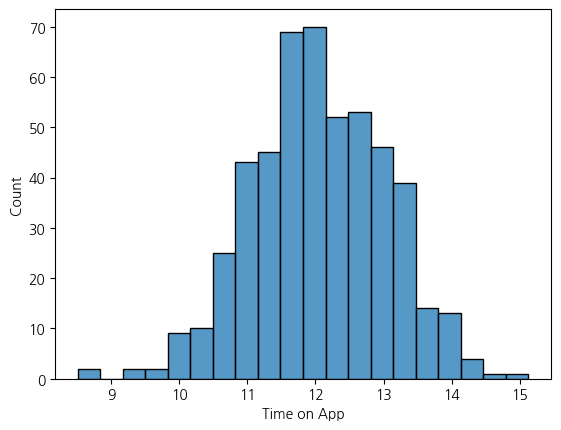

Time on App
15.126994    765.518462
12.207298    744.221867
13.858062    725.584814
13.919494    712.396327
12.729720    708.935185
                ...    
11.747732    298.762008
11.562936    282.471246
10.745189    275.918421
11.851399    266.086341
10.256549    256.670582
Name: Yearly Amount Spent, Length: 500, dtype: float64


============================== Time on Website ==============================
500 [39.57766802 37.26895887 37.11059744 36.72128268 37.5366533  34.47687763
 36.68377615 37.37335886 37.53449734 37.14516822 37.22580613 37.08792607
 37.42021558 36.1446667  36.61995708 36.21376309 34.89409275 38.38513659
 38.24411459 37.1905038  37.60779252 37.44102134 38.73400629 36.77260376
 37.63575588 37.73852495 36.43064962 37.85177917 35.29308775 37.27781174
 36.16364817 35.62244242 35.69417499 38.87804051 35.36862633 38.768641
 36.76572236 37.0443614  37.38831487 36.37147981 37.53429101 37.49669015
 37.14286198 36.88808605 36.11243501 39.13109673 37.33544589 36.46200326
 36

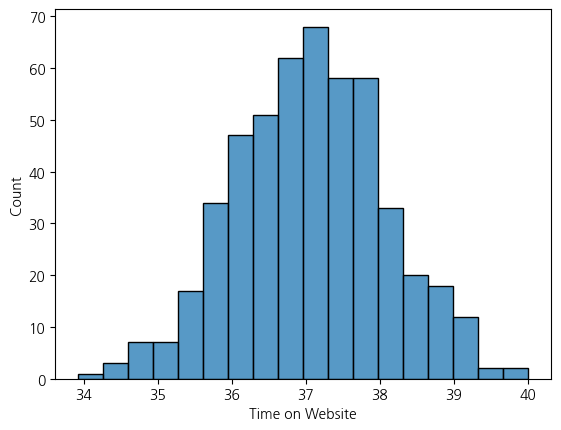

Time on Website
37.157624    765.518462
33.913847    744.221867
37.780265    725.584814
37.952013    712.396327
36.232110    708.935185
                ...    
36.939882    298.762008
35.976565    282.471246
38.791235    275.918421
36.925043    266.086341
36.143908    256.670582
Name: Yearly Amount Spent, Length: 500, dtype: float64


============================== Length of Membership ==============================
500 [4.08262063 2.66403418 4.1045432  3.12017878 4.44630832 5.4935072
 4.68501725 4.43427343 3.27343358 3.20280607 2.48260777 3.7132092
 4.04642316 3.91854184 2.49454365 3.35784684 3.13613272 2.42080616
 1.51657558 4.06454855 4.59993736 1.55915194 2.24514779 3.91930231
 5.70515397 2.72173599 4.64819932 2.99636453 3.92348875 4.74257752
 3.06236815 3.47141345 4.34306292 2.82009723 4.1245853  3.64928616
 1.84737042 3.45238858 4.65049127 4.22243623 4.67127546 4.64611998
 4.21449509 4.64325855 2.25868639 3.66310549 3.87687518 4.11322612
 3.2025312  3.19839927 5.97676813 2.952668

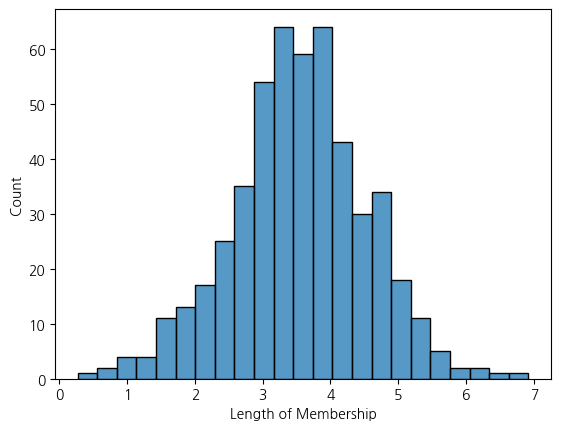

Length of Membership
5.377594    765.518462
6.922689    744.221867
5.976768    725.584814
5.066697    712.396327
5.705941    708.935185
               ...    
0.801516    298.762008
1.481617    282.471246
1.428824    275.918421
1.084585    266.086341
0.789520    256.670582
Name: Yearly Amount Spent, Length: 500, dtype: float64




In [54]:
for i in data.columns[:-1]:
    print('='*30,i,'='*30)
    print(data[i].nunique(), data[i].unique())
    print()
    sns.histplot(data[i])
    plt.show()
    print(data.groupby(i)['Yearly Amount Spent'].mean().sort_values(ascending=False))
    print()
    print()

In [58]:
data2 = data.drop(['Email', 'Address', 'Avatar'],axis=1)

In [59]:
data2.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

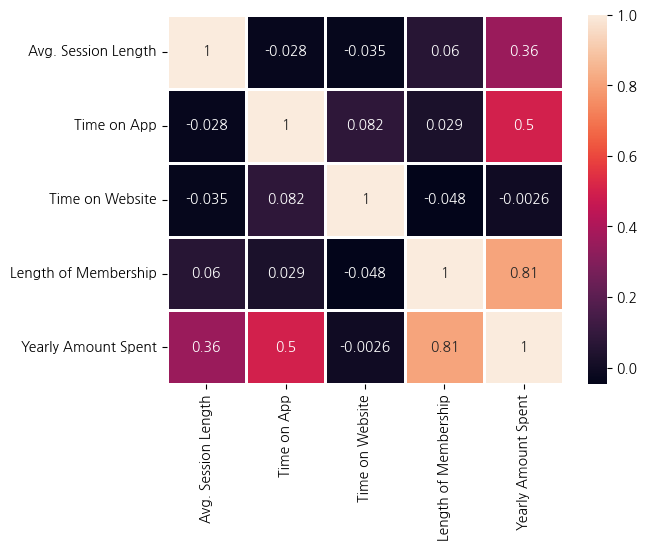

In [60]:
sns.heatmap(data2.corr(), annot=True, linewidths=1)

# 데이터 홀드아웃, 스케일링, 분석

In [72]:
X = data.drop(['Email', 'Address', 'Avatar','Yearly Amount Spent'],axis=1)
y = data['Yearly Amount Spent']

In [73]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


스케일링을 안했음..

In [74]:
from sklearn.model_selection import train_test_split


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Standard Scale로 맞춤

In [76]:
from sklearn.preprocessing import StandardScaler

In [78]:
ss= StandardScaler()
ss.fit(X_train)
ss_X_train = ss.

# 다중선형회귀분석

In [81]:
# statsmodels의 python 문법
import statsmodels.api as sm

Axes(0.125,0.11;0.775x0.77)


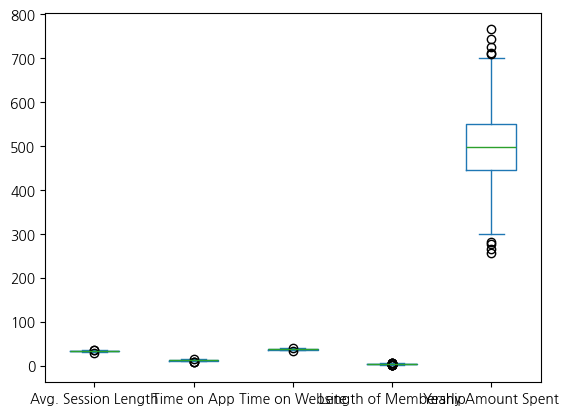

In [47]:

    print(X.plot(kind='box'))

In [51]:
X = sm.add_constant(X)
X

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,34.497268,12.655651,39.577668,4.082621
1,1.0,31.926272,11.109461,37.268959,2.664034
2,1.0,33.000915,11.330278,37.110597,4.104543
3,1.0,34.305557,13.717514,36.721283,3.120179
4,1.0,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
495,1.0,33.237660,13.566160,36.417985,3.746573
496,1.0,34.702529,11.695736,37.190268,3.576526
497,1.0,32.646777,11.499409,38.332576,4.958264
498,1.0,33.322501,12.391423,36.840086,2.336485


In [52]:
# 모델 훈련
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
print( model.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                         16:05:54   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [62]:
X_try = X.drop('Time on Website', axis=1)
X_try 

,const,Avg. Session Length,Time on App,Length of Membership
0,1.0,34.497268,12.655651,4.082621
1,1.0,31.926272,11.109461,2.664034
2,1.0,33.000915,11.330278,4.104543
3,1.0,34.305557,13.717514,3.120179
4,1.0,33.330673,12.795189,4.446308
...,...,...,...,...
495,1.0,33.237660,13.566160,3.746573
496,1.0,34.702529,11.695736,3.576526
497,1.0,32.646777,11.499409,4.958264
498,1.0,33.322501,12.391423,2.336485


In [63]:
# 모델 훈련
model = sm.OLS(y, X_try ).fit()
y_pred = model.predict(X_try )
print( model.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                 1.036e+04
Date:                 Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                         16:18:44   Log-Likelihood:                -1857.4
No. Observations:                  500   AIC:                             3723.
Df Residuals:                      496   BIC:                             3740.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

* 다중회귀분석의 회귀식 <br>
y= 
* Adj. R-squared:0.984%의 설명력을 가지고 있다.
* p-value: 0.05 미만

# 회귀분석의 지표

* MSE(mean_squared_error): 평균제곱오차 - 회귀선과 데이터 간의 오차
* RMSE(root mean_squared_error): 루트평균제곱오차 - 단위를 다시 원위치 시킨 오차

In [83]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 회귀분석 모델로 예측하기
pred = lr.predict(X_test_const)

In [84]:
print("mean_squared_error: ", mean_squared_error(y_test, pred))
print("root_mean_squared_error: ", np.sqrt(mean_squared_error(y_test, pred)))

NameError: name 'pred' is not defined

In [85]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
347    593.156401
86     487.379306
75     478.719357
438    392.992256
15     461.780742
Name: Yearly Amount Spent, Length: 100, dtype: float64

단위에 따라서 숫자의 스케일감은 가감한다.

In [ ]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=pred, label='data_points')
sns.regplot(

## R문법으로 사용하기

In [86]:
# import statsmodels.api as sm <- 파이썬 방식
from statsmodels.formula.api import ols

In [87]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


# 사이킷런을 이용한 회귀분석

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
slr = LinearRegression(
)
slr.fit(X_train, X_test)
pred3 = slr.predict(X_test)
print("mse: ", mean_squared_error(y_test, pred3))
print("rmse: ", np.sqrt(mean_squared_error(y_test, pred3)))

ValueError: Found input variables with inconsistent numbers of samples: [400, 100]